In [178]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from utils import mnist
import numpy as np
import matplotlib.pyplot as plt

In [69]:
train_loader, test_loader = mnist()

In [227]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2=nn.Linear(128,128)
        self.fc3 = nn.Linear(128, 10)
        
        self.optim = optim.Adam(self.parameters(), lr=0.01)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.sigmoid(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = F.log_softmax(x, dim=1)
        return x
    
    def loss(self, output, target, **kwargs):
        self._loss = F.nll_loss(output, target, **kwargs)
        return self._loss

In [184]:
def train(epoch, model):
    for batch_idx, (data, target) in enumerate(train_loader):
        model.optim.zero_grad()
        output = model(data)
        loss = model.loss(output, target)
        loss.backward()
        model.optim.step()
            
        if batch_idx % 200 == 0:
            line = 'Train Epoch: {} [{}/{} ({:.0f}%)]\tLosses '.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader))
            losses = ' '.join(['{:.6f}'.format(model._loss.item()) ])
            print(line + losses)
            
    else:
        batch_idx += 1
        line = 'Train Epoch: {} [{}/{} ({:.0f}%)]\tLosses '.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader))
        losses = ' '.join([' {:.6f}'.format(model._loss.item()) ])
        print(line + losses)

In [185]:
def test_own(model):
    global test_score, test_loss
    correct = 0
    total = 0
    loss=0
    with torch.no_grad():
        for data, target in test_loader:
            images = data
            output = model(images)
            loss+= model.loss(output, target, size_average=False).item() # sum up batch loss
            _, predicted = torch.max(output.data, 1)
            #print(predicted)
            #print('T',target)
            total += target.size(0)
            correct += (predicted == target).sum()

    test_loss.append(loss/len(test_loader.dataset))
    test_score.append(100*int(correct)/total)
    return(100*int(correct)/total,loss/len(test_loader.dataset) )

In [128]:
torch.max?

In [219]:

test_own(model)

(84.81, 1.5410503234863282)

In [228]:
%%time
test_loss=[]
test_score=[]
model=Net()
for epoch in range(1, 200):
    train(epoch, model)
    print(test_own(model))
    #print(test(mode

Train Epoch: 1 [0/60000 (0%)]	Losses 2.308469
Train Epoch: 1 [10000/60000 (17%)]	Losses 1.589087
Train Epoch: 1 [20000/60000 (33%)]	Losses 1.579061
Train Epoch: 1 [30000/60000 (50%)]	Losses 1.552344
Train Epoch: 1 [40000/60000 (67%)]	Losses 1.545300
Train Epoch: 1 [50000/60000 (83%)]	Losses 1.524094
Train Epoch: 1 [60000/60000 (100%)]	Losses  1.546376
(88.46, 1.5557835739135741)
Train Epoch: 2 [0/60000 (0%)]	Losses 1.557669
Train Epoch: 2 [10000/60000 (17%)]	Losses 1.583804
Train Epoch: 2 [20000/60000 (33%)]	Losses 1.487682
Train Epoch: 2 [30000/60000 (50%)]	Losses 1.596185
Train Epoch: 2 [40000/60000 (67%)]	Losses 1.492276
Train Epoch: 2 [50000/60000 (83%)]	Losses 1.549836
Train Epoch: 2 [60000/60000 (100%)]	Losses  1.544781
(91.14, 1.535747737121582)
Train Epoch: 3 [0/60000 (0%)]	Losses 1.588555
Train Epoch: 3 [10000/60000 (17%)]	Losses 1.509529
Train Epoch: 3 [20000/60000 (33%)]	Losses 1.532710
Train Epoch: 3 [30000/60000 (50%)]	Losses 1.511253
Train Epoch: 3 [40000/60000 (67%)]	Los

Train Epoch: 22 [20000/60000 (33%)]	Losses 1.576507
Train Epoch: 22 [30000/60000 (50%)]	Losses 1.490785
Train Epoch: 22 [40000/60000 (67%)]	Losses 1.485459
Train Epoch: 22 [50000/60000 (83%)]	Losses 1.474931
Train Epoch: 22 [60000/60000 (100%)]	Losses  1.551846
(90.44, 1.5281008987426759)
Train Epoch: 23 [0/60000 (0%)]	Losses 1.567777
Train Epoch: 23 [10000/60000 (17%)]	Losses 1.529760
Train Epoch: 23 [20000/60000 (33%)]	Losses 1.533811
Train Epoch: 23 [30000/60000 (50%)]	Losses 1.584927
Train Epoch: 23 [40000/60000 (67%)]	Losses 1.510921
Train Epoch: 23 [50000/60000 (83%)]	Losses 1.513117
Train Epoch: 23 [60000/60000 (100%)]	Losses  1.504262
(90.95, 1.5222515617370604)
Train Epoch: 24 [0/60000 (0%)]	Losses 1.519443
Train Epoch: 24 [10000/60000 (17%)]	Losses 1.580328
Train Epoch: 24 [20000/60000 (33%)]	Losses 1.601810
Train Epoch: 24 [30000/60000 (50%)]	Losses 1.538490
Train Epoch: 24 [40000/60000 (67%)]	Losses 1.510343
Train Epoch: 24 [50000/60000 (83%)]	Losses 1.528068
Train Epoch: 2

Train Epoch: 43 [30000/60000 (50%)]	Losses 1.522092
Train Epoch: 43 [40000/60000 (67%)]	Losses 1.514030
Train Epoch: 43 [50000/60000 (83%)]	Losses 1.578810
Train Epoch: 43 [60000/60000 (100%)]	Losses  1.571289
(88.34, 1.530927709197998)
Train Epoch: 44 [0/60000 (0%)]	Losses 1.526479
Train Epoch: 44 [10000/60000 (17%)]	Losses 1.502305
Train Epoch: 44 [20000/60000 (33%)]	Losses 1.520384
Train Epoch: 44 [30000/60000 (50%)]	Losses 1.516083
Train Epoch: 44 [40000/60000 (67%)]	Losses 1.552097
Train Epoch: 44 [50000/60000 (83%)]	Losses 1.520307
Train Epoch: 44 [60000/60000 (100%)]	Losses  1.552178
(90.78, 1.5241267623901367)
Train Epoch: 45 [0/60000 (0%)]	Losses 1.506070
Train Epoch: 45 [10000/60000 (17%)]	Losses 1.505536
Train Epoch: 45 [20000/60000 (33%)]	Losses 1.517569
Train Epoch: 45 [30000/60000 (50%)]	Losses 1.490777
Train Epoch: 45 [40000/60000 (67%)]	Losses 1.491860
Train Epoch: 45 [50000/60000 (83%)]	Losses 1.552198
Train Epoch: 45 [60000/60000 (100%)]	Losses  1.543149
(90.88, 1.529

Train Epoch: 64 [40000/60000 (67%)]	Losses 1.494513
Train Epoch: 64 [50000/60000 (83%)]	Losses 1.514031
Train Epoch: 64 [60000/60000 (100%)]	Losses  1.494091
(90.58, 1.5324167137145996)
Train Epoch: 65 [0/60000 (0%)]	Losses 1.507857
Train Epoch: 65 [10000/60000 (17%)]	Losses 1.513652
Train Epoch: 65 [20000/60000 (33%)]	Losses 1.545270
Train Epoch: 65 [30000/60000 (50%)]	Losses 1.538480
Train Epoch: 65 [40000/60000 (67%)]	Losses 1.504985
Train Epoch: 65 [50000/60000 (83%)]	Losses 1.536067
Train Epoch: 65 [60000/60000 (100%)]	Losses  1.543871
(88.43, 1.5294214080810546)
Train Epoch: 66 [0/60000 (0%)]	Losses 1.573961
Train Epoch: 66 [10000/60000 (17%)]	Losses 1.538297
Train Epoch: 66 [20000/60000 (33%)]	Losses 1.558972
Train Epoch: 66 [30000/60000 (50%)]	Losses 1.491776
Train Epoch: 66 [40000/60000 (67%)]	Losses 1.549929
Train Epoch: 66 [50000/60000 (83%)]	Losses 1.603440
Train Epoch: 66 [60000/60000 (100%)]	Losses  1.524977
(88.57, 1.5244297958374022)
Train Epoch: 67 [0/60000 (0%)]	Losse

Train Epoch: 85 [50000/60000 (83%)]	Losses 1.557570
Train Epoch: 85 [60000/60000 (100%)]	Losses  1.500307
(89.51, 1.5244325904846192)
Train Epoch: 86 [0/60000 (0%)]	Losses 1.554949
Train Epoch: 86 [10000/60000 (17%)]	Losses 1.508164
Train Epoch: 86 [20000/60000 (33%)]	Losses 1.554830
Train Epoch: 86 [30000/60000 (50%)]	Losses 1.523044
Train Epoch: 86 [40000/60000 (67%)]	Losses 1.520308
Train Epoch: 86 [50000/60000 (83%)]	Losses 1.514834
Train Epoch: 86 [60000/60000 (100%)]	Losses  1.498624
(87.73, 1.5272023208618164)
Train Epoch: 87 [0/60000 (0%)]	Losses 1.516911
Train Epoch: 87 [10000/60000 (17%)]	Losses 1.517594
Train Epoch: 87 [20000/60000 (33%)]	Losses 1.559225
Train Epoch: 87 [30000/60000 (50%)]	Losses 1.485780
Train Epoch: 87 [40000/60000 (67%)]	Losses 1.534834
Train Epoch: 87 [50000/60000 (83%)]	Losses 1.594891
Train Epoch: 87 [60000/60000 (100%)]	Losses  1.503043
(90.27, 1.5258985061645507)
Train Epoch: 88 [0/60000 (0%)]	Losses 1.528187
Train Epoch: 88 [10000/60000 (17%)]	Losse

Train Epoch: 106 [50000/60000 (83%)]	Losses 1.525344
Train Epoch: 106 [60000/60000 (100%)]	Losses  1.497240
(88.83, 1.526970603942871)
Train Epoch: 107 [0/60000 (0%)]	Losses 1.492487
Train Epoch: 107 [10000/60000 (17%)]	Losses 1.581920
Train Epoch: 107 [20000/60000 (33%)]	Losses 1.599299
Train Epoch: 107 [30000/60000 (50%)]	Losses 1.494735
Train Epoch: 107 [40000/60000 (67%)]	Losses 1.500307
Train Epoch: 107 [50000/60000 (83%)]	Losses 1.550924
Train Epoch: 107 [60000/60000 (100%)]	Losses  1.487547
(85.97, 1.533728636932373)
Train Epoch: 108 [0/60000 (0%)]	Losses 1.499872
Train Epoch: 108 [10000/60000 (17%)]	Losses 1.485793
Train Epoch: 108 [20000/60000 (33%)]	Losses 1.517090
Train Epoch: 108 [30000/60000 (50%)]	Losses 1.525015
Train Epoch: 108 [40000/60000 (67%)]	Losses 1.523035
Train Epoch: 108 [50000/60000 (83%)]	Losses 1.529556
Train Epoch: 108 [60000/60000 (100%)]	Losses  1.510924
(88.32, 1.5378024429321289)
Train Epoch: 109 [0/60000 (0%)]	Losses 1.517131
Train Epoch: 109 [10000/60

Train Epoch: 127 [30000/60000 (50%)]	Losses 1.540307
Train Epoch: 127 [40000/60000 (67%)]	Losses 1.514239
Train Epoch: 127 [50000/60000 (83%)]	Losses 1.532082
Train Epoch: 127 [60000/60000 (100%)]	Losses  1.531003
(89.4, 1.5333197853088378)
Train Epoch: 128 [0/60000 (0%)]	Losses 1.512707
Train Epoch: 128 [10000/60000 (17%)]	Losses 1.480307
Train Epoch: 128 [20000/60000 (33%)]	Losses 1.542609
Train Epoch: 128 [30000/60000 (50%)]	Losses 1.545016
Train Epoch: 128 [40000/60000 (67%)]	Losses 1.552097
Train Epoch: 128 [50000/60000 (83%)]	Losses 1.530180
Train Epoch: 128 [60000/60000 (100%)]	Losses  1.493988
(87.68, 1.5350422920227051)
Train Epoch: 129 [0/60000 (0%)]	Losses 1.559977
Train Epoch: 129 [10000/60000 (17%)]	Losses 1.550501
Train Epoch: 129 [20000/60000 (33%)]	Losses 1.499542
Train Epoch: 129 [30000/60000 (50%)]	Losses 1.602969
Train Epoch: 129 [40000/60000 (67%)]	Losses 1.494834
Train Epoch: 129 [50000/60000 (83%)]	Losses 1.593990
Train Epoch: 129 [60000/60000 (100%)]	Losses  1.50

Train Epoch: 148 [10000/60000 (17%)]	Losses 1.520327
Train Epoch: 148 [20000/60000 (33%)]	Losses 1.540309
Train Epoch: 148 [30000/60000 (50%)]	Losses 1.548920
Train Epoch: 148 [40000/60000 (67%)]	Losses 1.540307
Train Epoch: 148 [50000/60000 (83%)]	Losses 1.567751
Train Epoch: 148 [60000/60000 (100%)]	Losses  1.520307
(88.57, 1.5265183197021484)
Train Epoch: 149 [0/60000 (0%)]	Losses 1.502700
Train Epoch: 149 [10000/60000 (17%)]	Losses 1.584790
Train Epoch: 149 [20000/60000 (33%)]	Losses 1.499977
Train Epoch: 149 [30000/60000 (50%)]	Losses 1.491767
Train Epoch: 149 [40000/60000 (67%)]	Losses 1.563020
Train Epoch: 149 [50000/60000 (83%)]	Losses 1.500307
Train Epoch: 149 [60000/60000 (100%)]	Losses  1.520307
(90.08, 1.527399909210205)
Train Epoch: 150 [0/60000 (0%)]	Losses 1.519977
Train Epoch: 150 [10000/60000 (17%)]	Losses 1.559542
Train Epoch: 150 [20000/60000 (33%)]	Losses 1.531767
Train Epoch: 150 [30000/60000 (50%)]	Losses 1.474834
Train Epoch: 150 [40000/60000 (67%)]	Losses 1.5312

(87.96, 1.532872592163086)
Train Epoch: 169 [0/60000 (0%)]	Losses 1.576999
Train Epoch: 169 [10000/60000 (17%)]	Losses 1.501949
Train Epoch: 169 [20000/60000 (33%)]	Losses 1.533964
Train Epoch: 169 [30000/60000 (50%)]	Losses 1.534504
Train Epoch: 169 [40000/60000 (67%)]	Losses 1.527825
Train Epoch: 169 [50000/60000 (83%)]	Losses 1.537570
Train Epoch: 169 [60000/60000 (100%)]	Losses  1.512097
(88.13, 1.537291716003418)
Train Epoch: 170 [0/60000 (0%)]	Losses 1.540307
Train Epoch: 170 [10000/60000 (17%)]	Losses 1.531253
Train Epoch: 170 [20000/60000 (33%)]	Losses 1.553330
Train Epoch: 170 [30000/60000 (50%)]	Losses 1.516701
Train Epoch: 170 [40000/60000 (67%)]	Losses 1.508491
Train Epoch: 170 [50000/60000 (83%)]	Losses 1.605174
Train Epoch: 170 [60000/60000 (100%)]	Losses  1.548187
(86.04, 1.537650087738037)
Train Epoch: 171 [0/60000 (0%)]	Losses 1.556169
Train Epoch: 171 [10000/60000 (17%)]	Losses 1.617570
Train Epoch: 171 [20000/60000 (33%)]	Losses 1.508926
Train Epoch: 171 [30000/60000

Train Epoch: 189 [50000/60000 (83%)]	Losses 1.522714
Train Epoch: 189 [60000/60000 (100%)]	Losses  1.567446
(89.3, 1.5354806205749512)
Train Epoch: 190 [0/60000 (0%)]	Losses 1.502657
Train Epoch: 190 [10000/60000 (17%)]	Losses 1.493990
Train Epoch: 190 [20000/60000 (33%)]	Losses 1.574399
Train Epoch: 190 [30000/60000 (50%)]	Losses 1.543453
Train Epoch: 190 [40000/60000 (67%)]	Losses 1.532097
Train Epoch: 190 [50000/60000 (83%)]	Losses 1.494834
Train Epoch: 190 [60000/60000 (100%)]	Losses  1.528516
(89.02, 1.5317609924316407)
Train Epoch: 191 [0/60000 (0%)]	Losses 1.493660
Train Epoch: 191 [10000/60000 (17%)]	Losses 1.496666
Train Epoch: 191 [20000/60000 (33%)]	Losses 1.505450
Train Epoch: 191 [30000/60000 (50%)]	Losses 1.514836
Train Epoch: 191 [40000/60000 (67%)]	Losses 1.477570
Train Epoch: 191 [50000/60000 (83%)]	Losses 1.499872
Train Epoch: 191 [60000/60000 (100%)]	Losses  1.505450
(87.96, 1.5313318504333495)
Train Epoch: 192 [0/60000 (0%)]	Losses 1.490938
Train Epoch: 192 [10000/6

In [ ]:
test_loss

In [229]:
len(test_score)

199

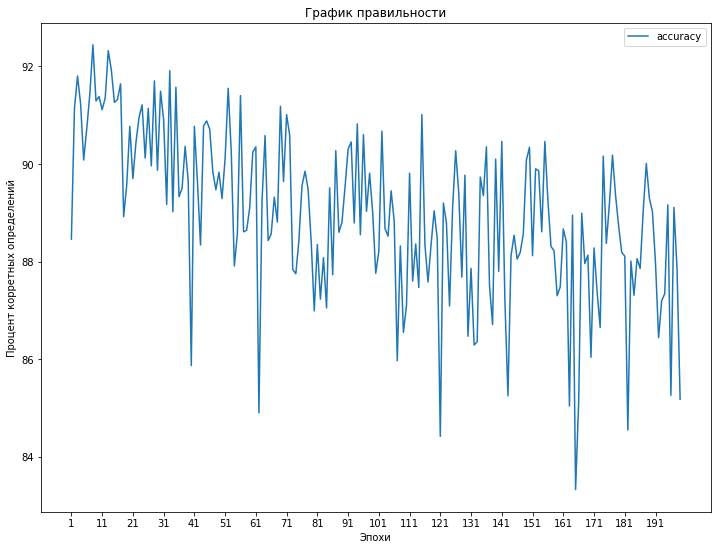

In [230]:

plt.plot([i for i in range(1,len(test_score)+1)], test_score, label='accuracy',)


plt.xlabel('Эпохи')
plt.ylabel('Процент корретных определений')
plt.rcParams["figure.figsize"] = fig_size
plt.title("График правильности")
plt.xticks(range(1,200,10))
plt.legend()

plt.show()

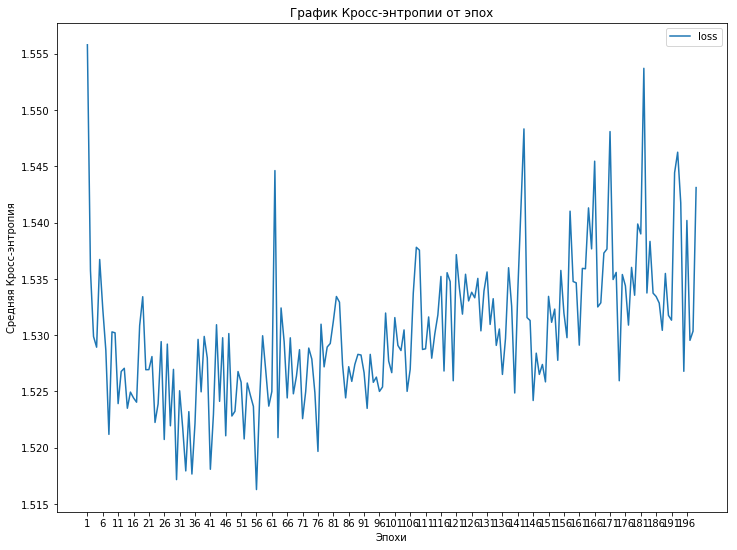

In [231]:

plt.plot([i for i in range(1,len(test_loss)+1)], test_loss, label='loss',)


plt.xlabel('Эпохи')
plt.ylabel('Средняя Кросс-энтропия')
plt.xlim
plt.title("График Кросс-энтропии от эпох")
plt.xticks(range(1,200,5))
plt.legend()
plt.rcParams["figure.figsize"] = fig_size
plt.show()